> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - NCIS Firearm Background Checks

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data, is sourced from the FBI's NICS, which helps determine a buyer's eligibility to purchase firearms or explosives. Used by gun shops, it ensures customers have no disqualifying criminal records. This data details firearm checks by month, state, and type. Supplementary state-level data comes from census.gov, contained in a .csv file, mostly for 2016. The key inquiries are: which census data correlates with high gun ownership per capita, which states show significant growth in gun registrations, and the general trend of gun purchases.

List of columns in NCIS-Firearm-Background-Check and their purpose-
* month: The month in which the checks were conducted.
* state: The U.S. state where the checks took place.
* permit: Number of checks for firearm permits.
* permit_recheck: Number of rechecks of existing permits.
* handgun: Number of background checks for handgun purchases.
* long_gun: Number of background checks for long gun (e.g., rifles) purchases.
* other: Number of checks for other types of firearms (not specified as handgun or long gun).
* multiple: Number of checks where multiple firearms were to be purchased.
* admin: Administrative checks, possibly internal or corrections to previous entries.
* prepawn_handgun: Number of checks for handguns that were to be pawned.
* prepawn_long_gun: Number of checks for long guns that were to be pawned.
* prepawn_other: Number of checks for other types of firearms that were to be pawned.
* redemption_handgun: Number of checks for handguns that were redeemed from pawn shops.
* redemption_long_gun: Number of checks for long guns that were redeemed from pawn shops.
* redemption_other: Number of checks for other types of firearms redeemed from pawn shops.
* returned_handgun: Number of checks for handguns that were returned.
* returned_long_gun: Number of checks for long guns that were returned.
* returned_other: Number of checks for other firearms that were returned.
* rentals_handgun: Number of background checks for handgun rentals.
* rentals_long_gun: Number of background checks for long gun rentals.
* private_sale_handgun: Number of checks for private sales of handguns.
* private_sale_long_gun: Number of checks for private sales of long guns.
* private_sale_other: Number of checks for private sales of other types of firearms.
* return_to_seller_handgun: Number of checks where the handgun was returned to the seller.
* return_to_seller_long_gun: Number of checks where the long gun was returned to the seller.
* return_to_seller_other: Number of checks where other types of firearms were returned to the seller.
* totals: Total number of background checks for that particular month and state.



### Question(s) for Analysis

<span style='color:red'>Which states have the most permits? Which states have multiple firearm purchases? Which states have the largest growth in background checks per capita?
 What months have the highest firearm purchases? 
</span>



In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.



import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyparsing
import dateutil
import pytz
import requests
import urllib3

%matplotlib inline

# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations initially. This does not have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, trim the excess and organize your steps so that you have a flowing, cohesive report.

In [6]:
#import data
us_census = pd.read_csv('US_Census_Data.csv')
gun_data = pd.read_csv('gun_data.csv')


In [7]:
# This function will perform the following data cleaning: print out the shape, duplicated values, column data types and missing values for each dataframe

def data_cleaning(df):
    # Print the shape of the dataframe
    print("Dataframe shape:", df.shape)
    print("----------------------------------------------")
    
    # Find and print duplicated values
    duplicate_rows = df[df.duplicated()]
    if len(duplicate_rows) > 0:
        print("Duplicated values:")
        print(duplicate_rows)
    else:
        print("No duplicated values found.")
    print("----------------------------------------------")
    
    # Print column data types
    print("Column data types and missing values for each column:")
    print(df.info())
    print("----------------------------------------------")
    
  


In [8]:
#show the first 5 columns
gun_data.head(5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [9]:
data_cleaning(gun_data)

Dataframe shape: (12485, 27)
----------------------------------------------
No duplicated values found.
----------------------------------------------
Column data types and missing values for each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_l

Gun Data has a couple issues:
1. A lot of the numeric columns have the a data type float (not including multiple and totals). I would change those two for consistency with the other columns. 
2. Month data should be converted to datetime
3. There are a lot of columns with missing values. I will add 0 in place of fields that have nullls. 

### Data Cleaning (Gun Data)

### Change type for multiple and totals

In [10]:
gun_data['multiple'] = gun_data['multiple'].astype(float)
gun_data['totals'] = gun_data['totals'].astype(float)

### Update month date type in gun_data

In [13]:
gun_data['month'] = pd.to_datetime(gun_data['month'])
# gun_data.dtypes

### Input missing values with 0


In [14]:
gun_data.fillna(0, inplace=True)

In [10]:
# descriptive statistics for Gun Data

gun_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,...,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000
mean,6401.300441,102.727433,5931.364277,7798.960833,158.798078,268.603364,58.789588,4.076652,6.613696,0.067841,...,0.149379,0.006087,0.005767,3.289868,2.555707,0.226912,0.079696,0.097317,0.019143,21595.725911
std,23731.158830,2756.731662,8614.954626,9307.740581,913.339655,783.185073,604.262697,10.174706,15.395329,0.681467,...,1.710795,0.179790,0.173912,33.987054,25.908792,2.139596,0.663611,0.740136,0.186114,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,857.000000,2063.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,511.000000,0.000000,3046.000000,5114.000000,0.000000,125.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4257.000000,0.000000,7277.000000,10374.000000,89.000000,301.000000,0.000000,3.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [15]:
us_census.head(5)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [16]:
data_cleaning(us_census)

Dataframe shape: (85, 52)
----------------------------------------------
Duplicated values:
   Fact Fact Note Alabama Alaska Arizona Arkansas California Colorado  \
67  NaN       NaN     NaN    NaN     NaN      NaN        NaN      NaN   
70  NaN       NaN     NaN    NaN     NaN      NaN        NaN      NaN   
75  NaN       NaN     NaN    NaN     NaN      NaN        NaN      NaN   

   Connecticut Delaware  ... South Dakota Tennessee Texas Utah Vermont  \
67         NaN      NaN  ...          NaN       NaN   NaN  NaN     NaN   
70         NaN      NaN  ...          NaN       NaN   NaN  NaN     NaN   
75         NaN      NaN  ...          NaN       NaN   NaN  NaN     NaN   

   Virginia Washington West Virginia Wisconsin Wyoming  
67      NaN        NaN           NaN       NaN     NaN  
70      NaN        NaN           NaN       NaN     NaN  
75      NaN        NaN           NaN       NaN     NaN  

[3 rows x 52 columns]
----------------------------------------------
Column data types an

Issues with Census data
1. The Fact column seems to have more non null values then the other columns. 80 columns to be exact.
2. Fact Note has a lot of mising values
3. The majority of the columns data types are string but the data shows integers or floats
4. I would also transpose the rows and columns
5. I also need to remove the duplicated values in us_census. There is 3 duplicated values 
6. Dropping Fact Note 


### Data Cleaning (US Census)
 

### Cleaning up duplicated values for us_census


In [17]:
us_census.drop_duplicates(inplace=True)

### Removing the last 21 rows because there are majority null values and is not needed for my analysis


In [18]:
us_census.tail(20)

us_census.drop(us_census.tail(21).index, inplace=True)


### Switch rows and columns


In [19]:
us_census = us_census.transpose()


In [30]:
us_census.head(10)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012"
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"1,634,391","67,370,353",1.90%,"322,025","374,153","203,604","137,630","92,219","272,651","41,943"
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"267,999","15,643,303",0.40%,"55,521","68,032","35,402","22,141","13,688","51,147","7,953"
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"2,295,186","102,671,393",2.40%,"451,951","499,926","245,243","182,425","135,313","344,981","46,780"
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"1,003,113","39,451,191",1.10%,"198,380","231,959","123,158","75,962","35,982","189,029","25,915"
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"14,325,377","856,954,246",3.50%,"3,206,958","3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377"
Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,10.90%,...,"2,253,795","117,539,555",3.30%,"480,847","547,352","284,554","194,508","85,849","442,365","51,722"
Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,14.20%,...,"1,503,102","92,555,072",1.20%,"272,809","326,693","187,845","106,678","56,113","259,614","31,056"
Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,14.40%,...,"397,385","21,305,227",1.50%,"60,734","73,418","38,328","23,964","14,440","54,782","7,206"
Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,17.30%,...,"7,777,990","337,074,525",4.50%,"2,040,339","2,100,187","1,084,885","807,817","926,112","1,121,749","185,756"


In [20]:
#Make 'Fact' row the header
us_census.columns = us_census.iloc[0]
us_census = us_census.drop(us_census.index[0])

In [27]:

#rename Fact to States
us_census.rename(columns={"Fact": "States"}, inplace=True)

In [32]:
us_census.head(10)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012"
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"1,634,391","67,370,353",1.90%,"322,025","374,153","203,604","137,630","92,219","272,651","41,943"
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"267,999","15,643,303",0.40%,"55,521","68,032","35,402","22,141","13,688","51,147","7,953"
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"2,295,186","102,671,393",2.40%,"451,951","499,926","245,243","182,425","135,313","344,981","46,780"
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"1,003,113","39,451,191",1.10%,"198,380","231,959","123,158","75,962","35,982","189,029","25,915"
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"14,325,377","856,954,246",3.50%,"3,206,958","3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377"
Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,10.90%,...,"2,253,795","117,539,555",3.30%,"480,847","547,352","284,554","194,508","85,849","442,365","51,722"
Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,14.20%,...,"1,503,102","92,555,072",1.20%,"272,809","326,693","187,845","106,678","56,113","259,614","31,056"
Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,14.40%,...,"397,385","21,305,227",1.50%,"60,734","73,418","38,328","23,964","14,440","54,782","7,206"
Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,17.30%,...,"7,777,990","337,074,525",4.50%,"2,040,339","2,100,187","1,084,885","807,817","926,112","1,121,749","185,756"


### Dropping Fact Note

In [29]:
us_census = us_census.drop("Fact Note")


In [31]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Fact to Wyoming
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       51 non-null     object
 1   1       51 non-null     object
 2   2       51 non-null     object
 3   3       51 non-null     object
 4   4       51 non-null     object
 5   5       51 non-null     object
 6   6       51 non-null     object
 7   7       51 non-null     object
 8   8       51 non-null     object
 9   9       51 non-null     object
 10  10      51 non-null     object
 11  11      51 non-null     object
 12  12      51 non-null     object
 13  13      51 non-null     object
 14  14      51 non-null     object
 15  15      51 non-null     object
 16  16      51 non-null     object
 17  17      51 non-null     object
 18  18      51 non-null     object
 19  19      51 non-null     object
 20  20      51 non-null     object
 21  21      51 non-null     object
 22  22      51 non-null     o

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. Remember to utilize the visualizations that the pandas library already has available.



> **Tip**: Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.



# 1) Which states have the most permits? (top 10)

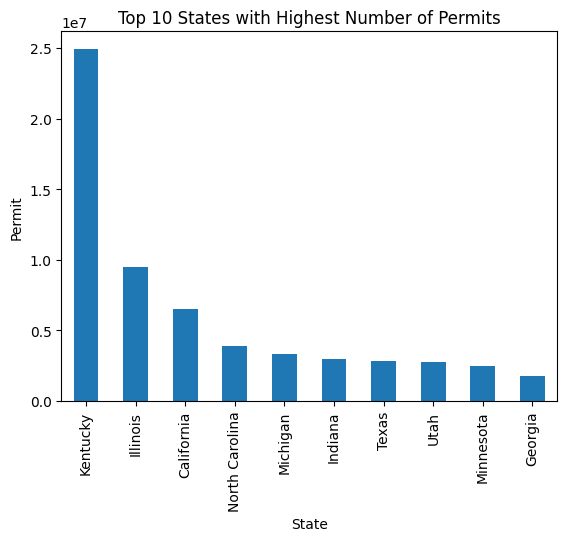

In [15]:

permit_grouped = gun_data.groupby('state')['permit'].sum().reset_index()

# sort the DataFrame by 'permit' column and take the top 10 rows
permit_sorted = permit_grouped.sort_values(by='permit', ascending=False).head(10)

# create a bar chart
permit_bar = permit_sorted.plot.bar(x='state', y='permit', legend=False)

# set the chart title and axis labels
plt.title('Top 10 States with Highest Number of Permits')
plt.xlabel('State')
plt.ylabel('Permit')


# display the chart
plt.show()

### 2) Which states have multiple firearm being purchased at once? (top 10)

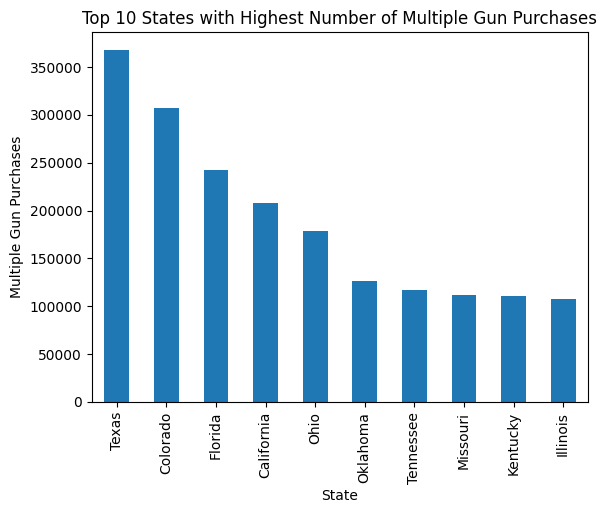

In [16]:
multi= gun_data[['state', 'multiple']]
multi_grouped = gun_data.groupby('state')['multiple'].sum().reset_index()
multi_sorted = multi_grouped.sort_values(by='multiple', ascending=False).head(10)
multi_bar = multi_sorted.plot.bar(x='state', y='multiple', legend=False)

plt.title('Top 10 States with Highest Number of Multiple Gun Purchases')
plt.xlabel('State')
plt.ylabel('Multiple Gun Purchases')

# display the chart
plt.show()

### 3) What are the poverty rates for states that have both high permits and multiple gun purchases?

In [17]:
states = us_census[['Kentucky', 'Illinois', 'California', 'Texas']]
poverty_rates = states.loc[42].str.replace(',', '').astype(float)

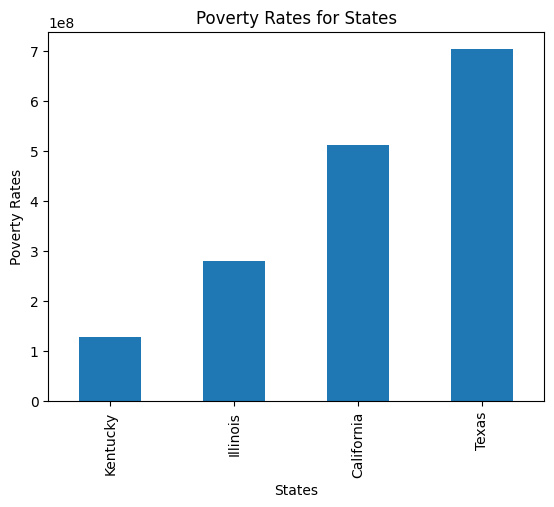

In [18]:
poverty_rates.plot(kind='bar')
plt.xlabel('States')
plt.ylabel('Poverty Rates')
plt.title('Poverty Rates for States')
plt.show()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb